### Reading the required libraries

In [1]:
library(ggplot2)
library(caret)
library(lmtest)
library(gridExtra)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




## **Reading the data**

In [2]:
loan=read.csv("../input/loan-predication//train_u6lujuX_CVtuZ9i (1).csv",header=T)
loan=loan[-1]
summary(loan)

    Gender            Married           Dependents         Education        
 Length:614         Length:614         Length:614         Length:614        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Self_Employed      ApplicantIncome CoapplicantIncome   LoanAmount   
 Length:614         Min.   :  150   Min.   :    0     Min.   :  9.0  
 Class :character   1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 Mode  :character   Median : 3812   Median : 1188     Median :128.0  
                    Mean   : 5403   Mean   : 1621     Mean   :146.4  
                    3rd Qu.: 5795 

The above summary shows that there are few missing values in the data

In [3]:
str(loan)

'data.frame':	614 obs. of  12 variables:
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "No" "Yes" "Yes" "Yes" ...
 $ Dependents       : chr  "0" "1" "0" "0" ...
 $ Education        : chr  "Graduate" "Graduate" "Graduate" "Not Graduate" ...
 $ Self_Employed    : chr  "No" "No" "Yes" "No" ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : int  NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : chr  "Urban" "Rural" "Urban" "Urban" ...
 $ Loan_Status      : chr  "Y" "N" "Y" "Y" ...


## **Checking for missing data**

First, I am converting the missing data that is present as an empty string into NA.

In [4]:
loan[loan==""]=NA

## **Converting the categorical data into factors**

In [5]:
loan$Gender=as.factor(loan$Gender)
loan$Married=as.factor(loan$Married)
loan$Education=as.factor(loan$Education)
loan$Self_Employed=as.factor(loan$Self_Employed)
loan$Property_Area=as.factor(loan$Property_Area)
loan$Loan_Status=as.factor(loan$Loan_Status)
loan[loan=="3+"]="3"
loan$Dependents=as.integer(loan$Dependents)

## **Replacing NA values**

The missing values present in the data are replaced by
* Median in the case of numerical variables
* Mode in the case of categorical variables

In [6]:
loan$Gender[is.na(loan$Gender)]="Male"
loan$Married[is.na(loan$Married)]="Yes"
loan$Dependents[is.na(loan$Dependents)]="0"
loan$Self_Employed[is.na(loan$Self_Employed)]="No"

In [7]:
loan$LoanAmount[is.na(loan$LoanAmount)]=median(loan$LoanAmount, na.rm=TRUE)
loan$Loan_Amount_Term[is.na(loan$Loan_Amount_Term)]=median(loan$Loan_Amount_Term, na.rm=TRUE)
loan$Credit_History[is.na(loan$Credit_History)]=median(loan$Credit_History, na.rm=TRUE)

## **Explanatory Data Analysis**


Bivariate Analysis for the variables is to be conducted with the dependent variable Loan_Status using percentage stacked barcharts.

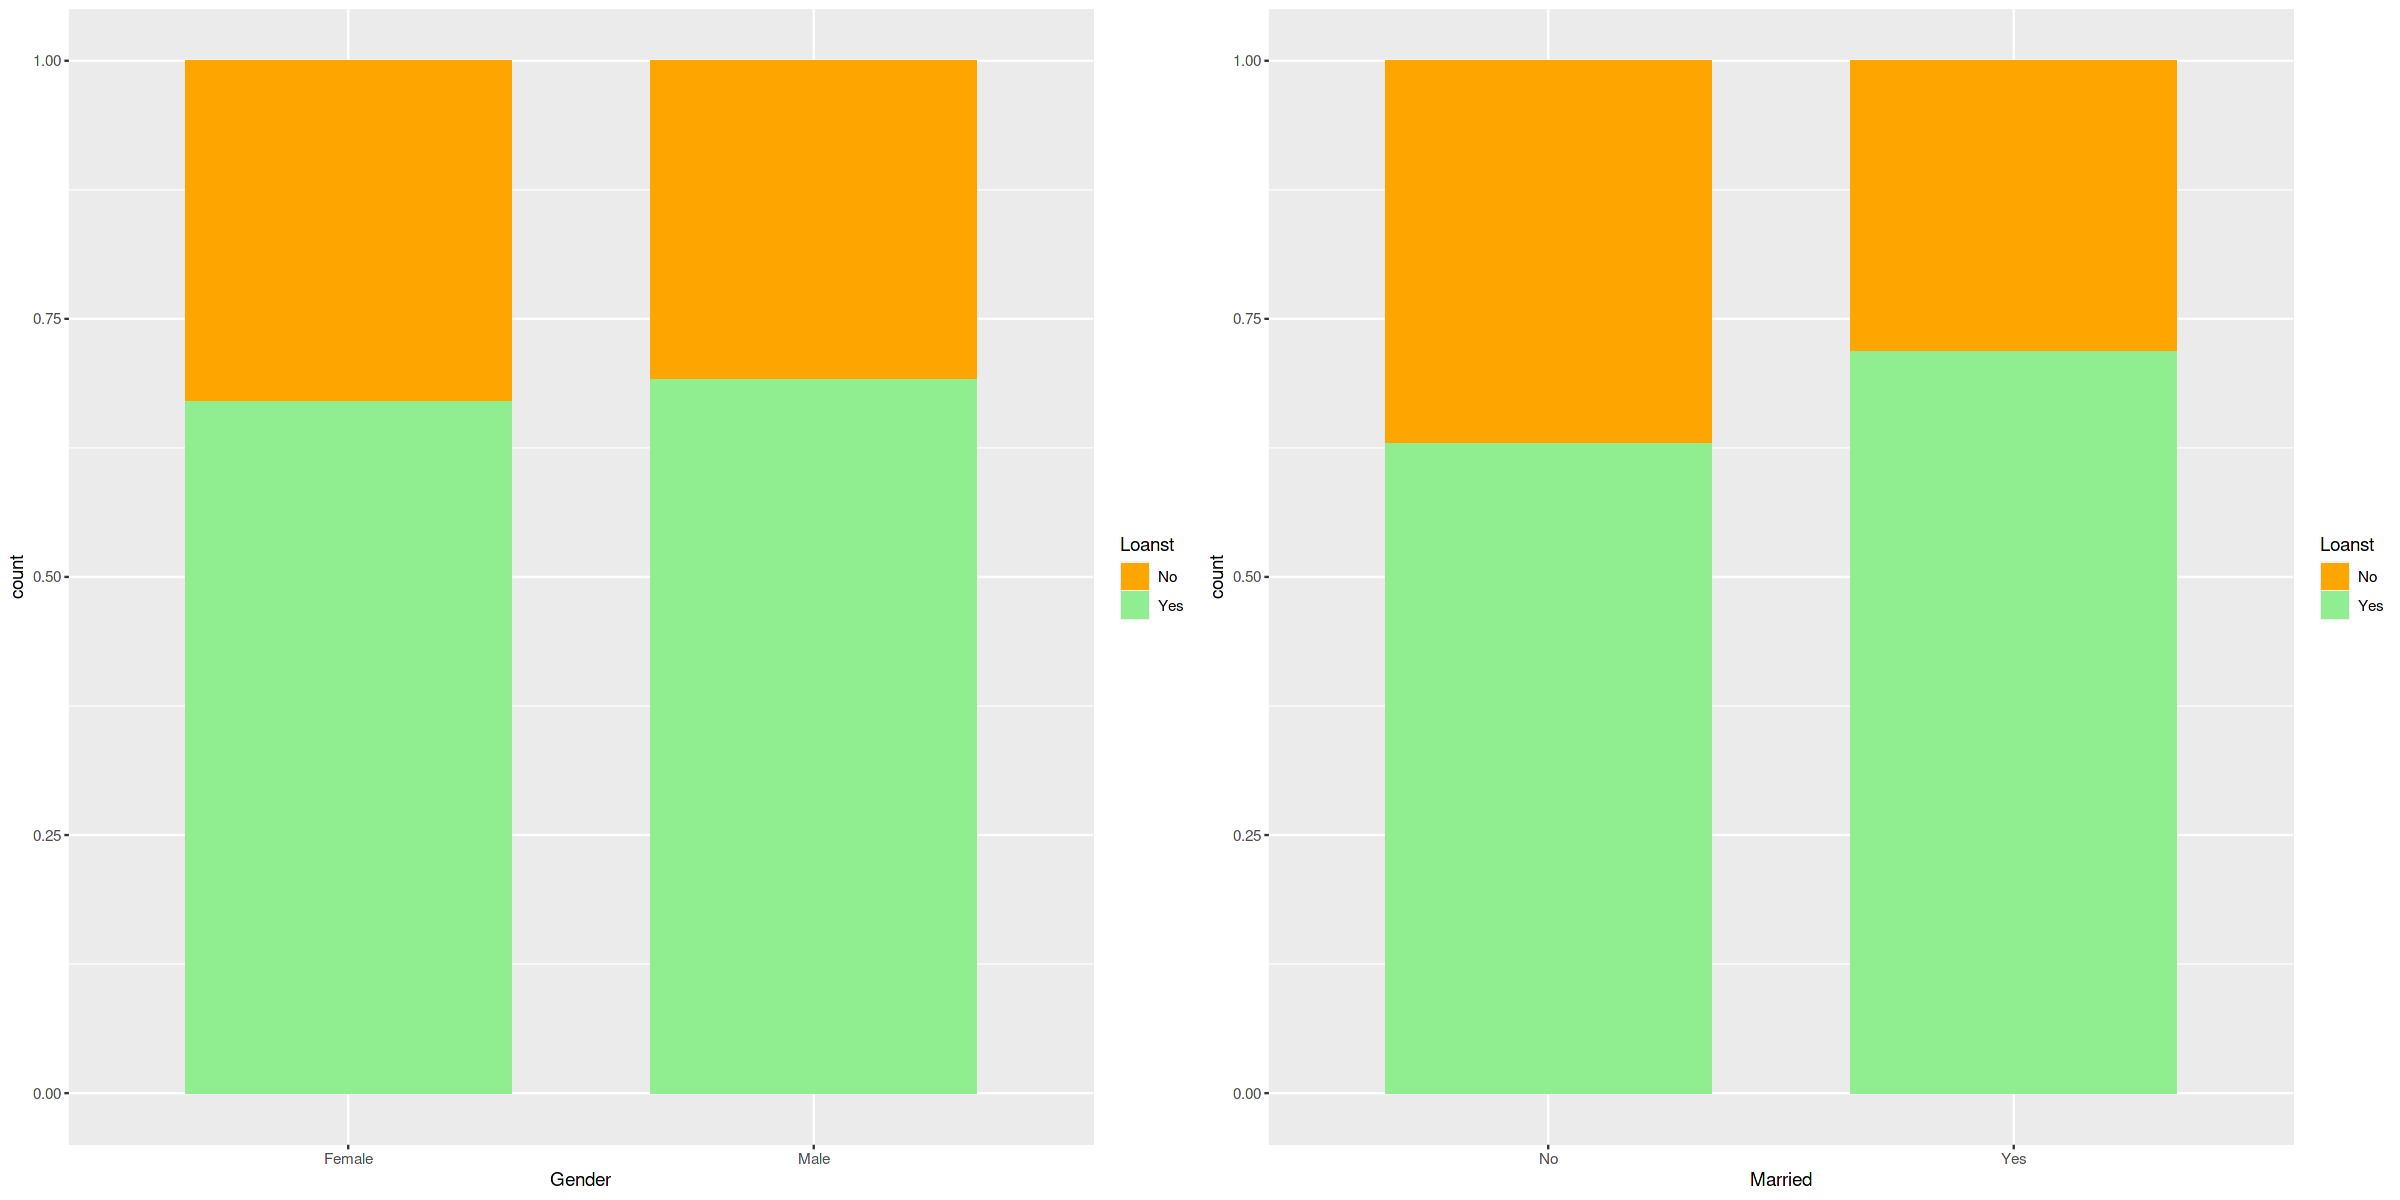

In [8]:
Gender=loan$Gender
Married=loan$Married
Dep=loan$Dependents
Edu=loan$Education
Emp=loan$Self_Employed
Cred=loan$Credit_History
Area=loan$Property_Area
Loanst=loan$Loan_Status

options(repr.plot.width = 20, repr.plot.height =10)
df=data.frame(Gender,Loanst)
plot1=ggplot(df,aes(x=Gender,fill=Loanst))+
  geom_bar(position="fill",width = 0.7)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

df1=data.frame(Married,Loanst)
plot2=ggplot(df1,aes(x=Married,fill=Loanst))+
  geom_bar(position="fill",width = 0.7)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

grid.arrange(plot1,plot2,ncol=2)

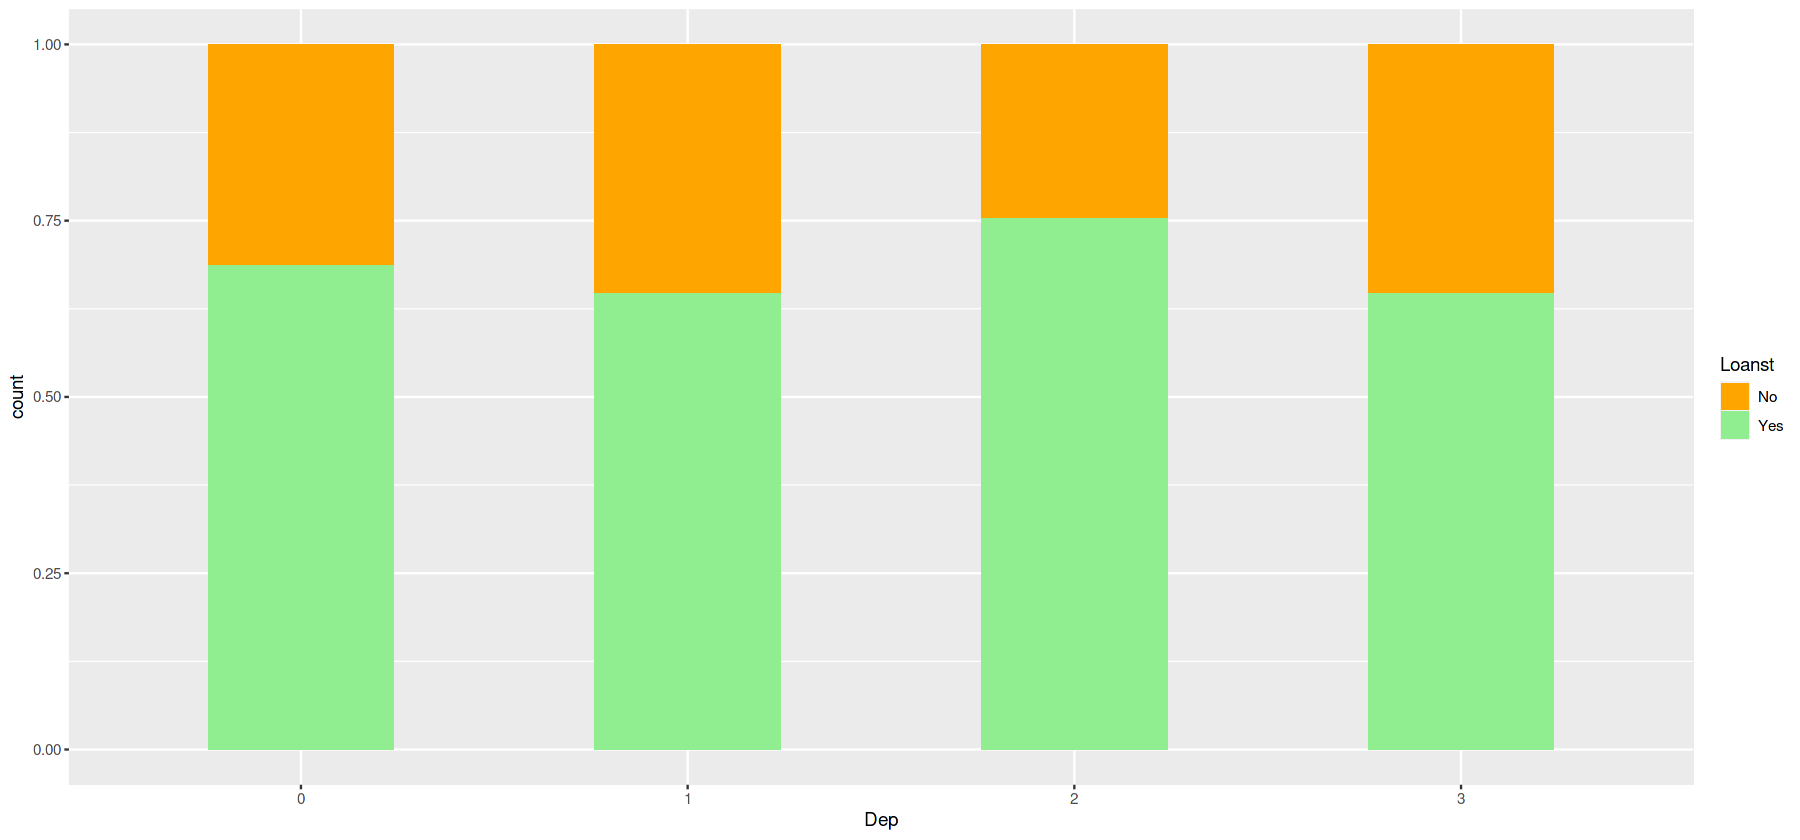

In [9]:
df=data.frame(Dep,Loanst)
options(repr.plot.width = 15, repr.plot.height =7)
ggplot(df,aes(x=Dep,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

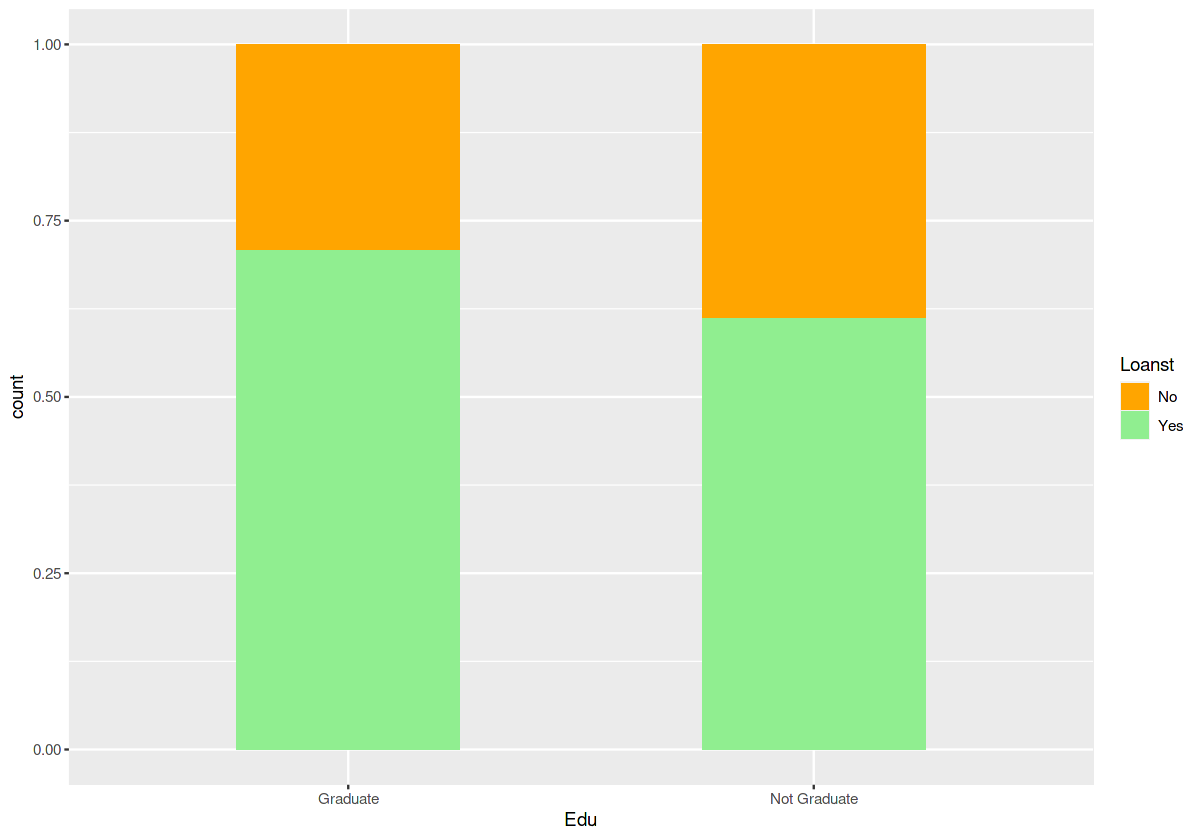

In [10]:
df=data.frame(Edu,Loanst)
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(df,aes(x=Edu,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

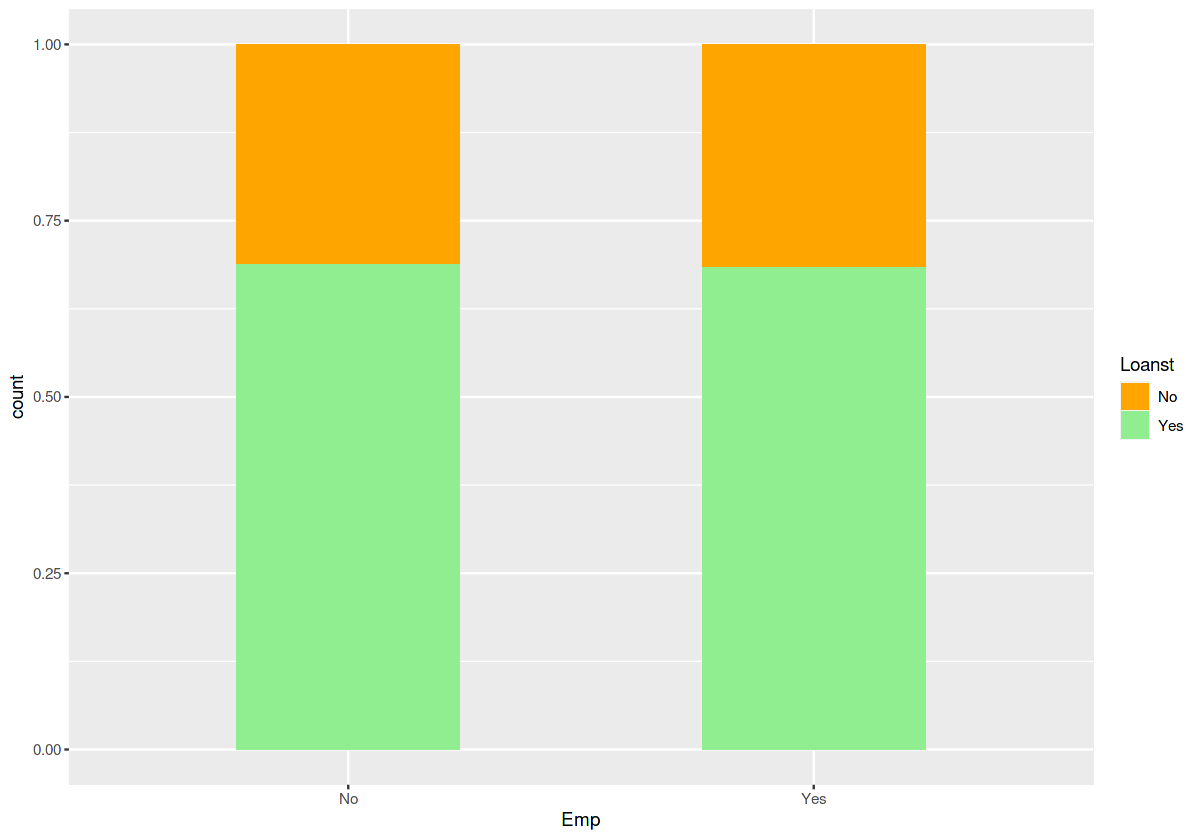

In [11]:
df=data.frame(Emp,Loanst)
ggplot(df,aes(x=Emp,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

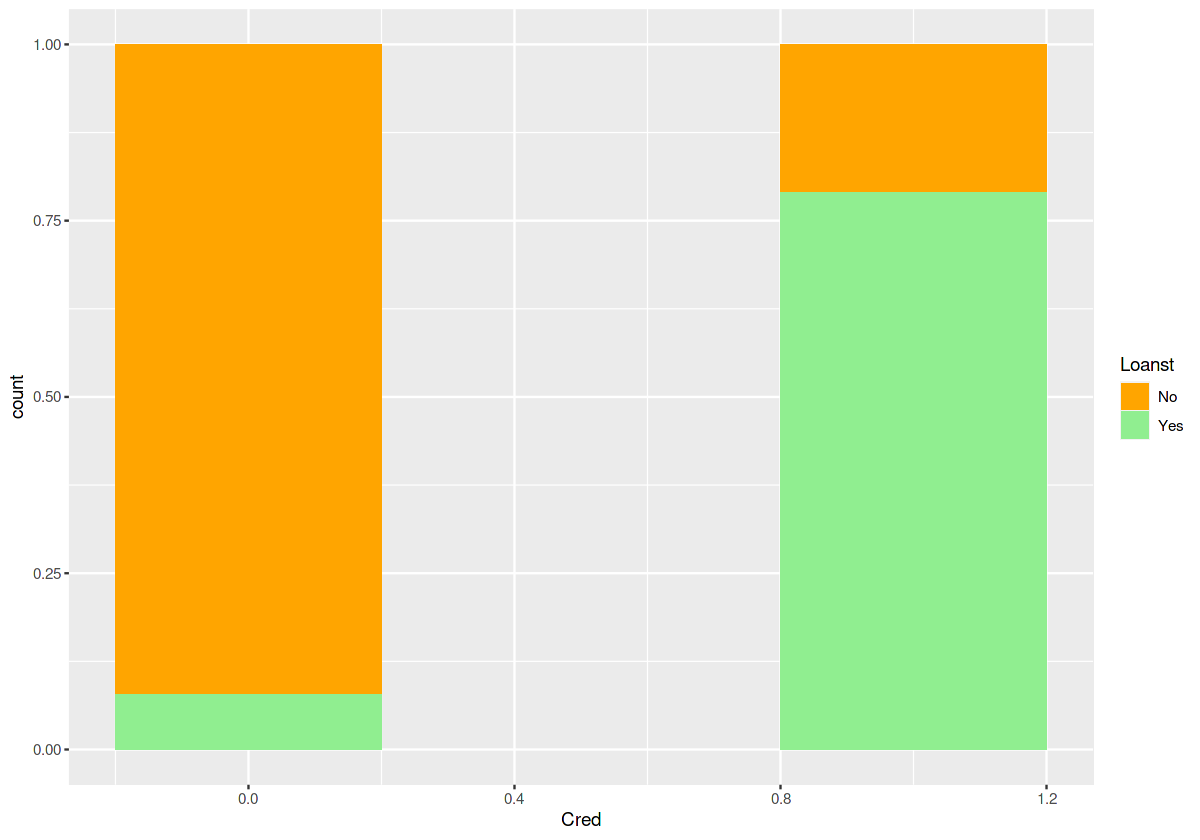

In [12]:
df=data.frame(Cred,Loanst)
ggplot(df,aes(x=Cred,fill=Loanst))+
  geom_bar(position="fill",width = 0.40)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

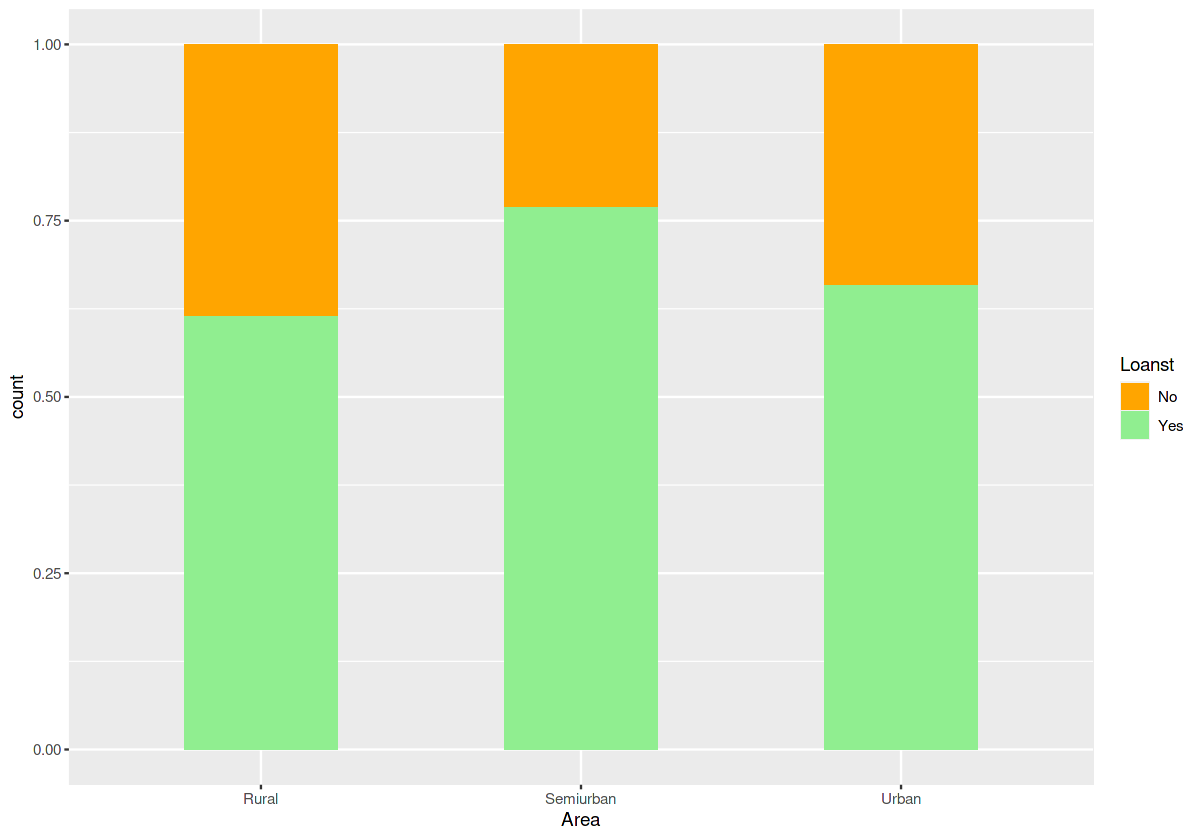

In [13]:
df=data.frame(Area,Loanst)
ggplot(df,aes(x=Area,fill=Loanst))+
  geom_bar(position="fill",width = 0.48)+
  scale_fill_manual(labels=c('No',"Yes"),values=c('orange','lightgreen'))

## **Converting factors into numeric**

### Dummy variables are created to include the categorical variables in the model construction.

In [14]:
loan$Gender=ifelse(loan$Gender=="Male",1,0)
loan$Married=ifelse(loan$Married=="Yes",1,0)
loan$Education=ifelse(loan$Education=="Graduate",1,0)
loan$Self_Employed=ifelse(loan$Self_Employed=="Yes",1,0)

## **Normalizing the data**

ApplicantIncome and Co-applicantIncome variables have a large number of outliers and are of similar category. So, a new variable is created, Total_Income as a result of sum of Applicant and Coapplicant Income. Similarly, a new variable EMI is created which is equal to the ratio of Loan Amount and Loan Amount Term.

The old variables ApplicantIncome, Co-applicantIncome, LoanAmount and LoanAmount_Term are removed from the data as they are highly correlated with the new variables.

In [15]:
loan$Total_Income=loan$ApplicantIncome+loan$CoapplicantIncome
loan=loan[-7]
loan=loan[-6]

loan$EMI=loan$LoanAmount/loan$Loan_Amount_Term
loan$EMI=log(loan$EMI)
loan=loan[-6]
loan=loan[-6]

The new variables Total_Income and EMI are skewed to the left. So, they are normalized by using logarithmic transformation.

In [16]:
loan$TotalIncome=log(loan$Total_Income)
loan=loan[-9]

So, the final summary of the dataset after all the data processing is as below.

In [17]:
summary(loan)

     Gender          Married        Dependents          Education     
 Min.   :0.0000   Min.   :0.0000   Length:614         Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   Class :character   1st Qu.:1.0000  
 Median :1.0000   Median :1.0000   Mode  :character   Median :1.0000  
 Mean   :0.8176   Mean   :0.6531                      Mean   :0.7818  
 3rd Qu.:1.0000   3rd Qu.:1.0000                      3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000                      Max.   :1.0000  
 Self_Employed    Credit_History    Property_Area Loan_Status      EMI         
 Min.   :0.0000   Min.   :0.000   Rural    :179   N:192       Min.   :-3.6889  
 1st Qu.:0.0000   1st Qu.:1.000   Semiurban:233   Y:422       1st Qu.:-1.2417  
 Median :0.0000   Median :1.000   Urban    :202               Median :-1.0186  
 Mean   :0.1336   Mean   :0.855                               Mean   :-0.9460  
 3rd Qu.:0.0000   3rd Qu.:1.000                               3rd Qu.:-0.6821  
 Max.   :1.0000   Max. 

In [18]:
str(loan)

'data.frame':	614 obs. of  10 variables:
 $ Gender        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Married       : num  0 1 1 1 0 1 1 1 1 1 ...
 $ Dependents    : chr  "0" "1" "0" "0" ...
 $ Education     : num  1 1 1 0 1 1 0 1 1 1 ...
 $ Self_Employed : num  0 0 1 0 0 1 0 0 0 0 ...
 $ Credit_History: num  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 3 3 3 2 3 2 ...
 $ Loan_Status   : Factor w/ 2 levels "N","Y": 2 1 2 2 2 2 2 1 2 1 ...
 $ EMI           : num  -1.034 -1.034 -1.696 -1.099 -0.937 ...
 $ TotalIncome   : num  8.67 8.71 8.01 8.51 8.7 ...


## **Data Partition**

The dataset is divided into two parts, training and testing datasets, of ratio 4:1. The training dataset is used for model construction on the data. The testing data is later to be used for prediction and model performance evaluation.

In [19]:
set.seed(5496)
ind=createDataPartition(loan$Loan_Status,p=0.8,list=F)
training=loan[ind,]
testing=loan[-ind,]

The structure of the testing data and training data set are

In [20]:
str(training)

'data.frame':	492 obs. of  10 variables:
 $ Gender        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Married       : num  0 1 1 1 1 1 1 1 1 1 ...
 $ Dependents    : chr  "0" "1" "0" "0" ...
 $ Education     : num  1 1 0 0 1 1 1 1 1 1 ...
 $ Self_Employed : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Credit_History: num  1 1 1 1 0 1 1 1 1 1 ...
 $ Property_Area : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 2 3 2 3 3 3 ...
 $ Loan_Status   : Factor w/ 2 levels "N","Y": 2 1 2 2 1 2 1 2 2 2 ...
 $ EMI           : num  -1.034 -1.034 -1.099 -1.332 -0.824 ...
 $ TotalIncome   : num  8.67 8.71 8.51 8.26 8.62 ...


In [21]:
str(testing)

'data.frame':	122 obs. of  10 variables:
 $ Gender        : num  1 1 1 1 1 1 1 1 0 1 ...
 $ Married       : num  1 0 1 1 1 1 1 1 0 0 ...
 $ Dependents    : chr  "0" "0" "2" "2" ...
 $ Education     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ Self_Employed : num  1 0 1 0 0 0 0 0 0 0 ...
 $ Credit_History: num  1 1 1 1 1 1 0 1 1 1 ...
 $ Property_Area : Factor w/ 3 levels "Rural","Semiurban",..: 3 3 3 3 1 3 1 3 2 3 ...
 $ Loan_Status   : Factor w/ 2 levels "N","Y": 2 2 2 2 1 2 1 2 2 1 ...
 $ EMI           : num  -1.696 -0.937 -0.299 -1.954 -0.996 ...
 $ TotalIncome   : num  8.01 8.7 9.17 7.78 8.49 ...


## **Model Construction**

First, a logistic model is constructed by taking all the variables into consideration.

In [22]:
model1=glm(Loan_Status~.,data=training, family="binomial")
summary(model1)


Call:
glm(formula = Loan_Status ~ ., family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1609  -0.4144   0.5537   0.7157   2.3174  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -4.840444   2.475478  -1.955   0.0505 .  
Gender                  0.054550   0.327580   0.167   0.8677    
Married                 0.605783   0.281091   2.155   0.0312 *  
Dependents1            -0.555804   0.316878  -1.754   0.0794 .  
Dependents2             0.253725   0.379690   0.668   0.5040    
Dependents3            -0.005697   0.475764  -0.012   0.9904    
Education               0.430510   0.287127   1.499   0.1338    
Self_Employed          -0.135047   0.340066  -0.397   0.6913    
Credit_History          3.789530   0.459685   8.244   <2e-16 ***
Property_AreaSemiurban  0.810823   0.291444   2.782   0.0054 ** 
Property_AreaUrban      0.171976   0.290282   0.592   0.5536    
EMI            

The above summary exhibits the significance of the variables. Based on the significance level, it is evident that the variables Credit History, Property Area, Marital status and Education are the most significant variables.

Different models are constructed on the training data by removing the variables that are not significant using the Backward Selection Procedure.

In [23]:
model2=glm(Loan_Status~Credit_History+Property_Area+Married+Education+Dependents,data=training, family="binomial")

model3=glm(Loan_Status~Credit_History+Property_Area+Married+Dependents,data=training, family="binomial")

model4=glm(Loan_Status~Credit_History+Property_Area+Married+Education,data=training, family="binomial")

model5=glm(Loan_Status~Credit_History+Property_Area+Married,data=training, family="binomial")

model6=glm(Loan_Status~Credit_History+Property_Area,data=training, family="binomial")

Nested models are created above from the full model with all the variables and then their Akaike’s Information Criterion (AIC) values are compared. The model with the lower AIC value among the nested model is considered a better model.

In [24]:
AIC(model1)
AIC(model2)
AIC(model3)
AIC(model4)
AIC(model5)
AIC(model6)

[1] 483.5018

[1] 476.9345

[1] 477.1986

[1] 475.7565

[1] 476.0027

[1] 480.3375

Comparing the AIC values of the models it is clear that the models 4 and 5 has lesser AIC values compared to other models.

Likelihood ratio tests are conducted to verify the nested models’ significance and determine the model with the best fit.

The null hypothesis of the test is taken as, Null Hypothesis: Nested model is better

If the p-value is less than significance level we reject the null hypothesis

In [25]:
lrtest(model1,model2)
lrtest(model2,model3)
lrtest(model2,model4)
lrtest(model4,model5)
lrtest(model4,model6)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13,-228.7509,NA,NA,NA
2,9,-229.4672,-4,1.432722,0.8384883


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,-229.4672,NA,NA,NA
2,8,-230.5993,-1,2.264099,0.1324032


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,-229.4672,NA,NA,NA
2,6,-231.8783,-3,4.822034,0.1853023


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,-231.8783,NA,NA,NA
2,5,-233.0013,-1,2.246163,0.1339462


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,-231.8783,NA,NA,NA
2,4,-236.1687,-2,8.580943,0.01369847


From the likelihood ratio tests conducted and the AIC values obtained before, we can say that model4 is the better fit for the model construction.

So, the final variables of significance are Credit History, Property Area, Marital status and Education, since this model exhibits the least AIC value and has the goodness of fit among the nested models created.

## **Evaluating Model Performance**
Now the predictions of credit risk are made on the testing data using the best fitted logistic model. The threshold value is set at 0.5 and the prediction values of the target variable are obtained as factors “Y” and “N”. Then a Confusion Matrix is obtained for comparing the predicted values to the actual values of the testing dataset.

In [26]:
res=predict(model4,testing,type="response")
contrasts(testing$Loan_Status)
predictedvalues=ifelse(res>0.5,'Y','N')
predictedvalues=as.factor(predictedvalues)

,Y
N,0
Y,1


In [27]:
confusionMatrix(predictedvalues,testing$Loan_Status,positive = 'Y')

Confusion Matrix and Statistics

          Reference
Prediction  N  Y
         N 19  1
         Y 19 83
                                          
               Accuracy : 0.8361          
                 95% CI : (0.7582, 0.8969)
    No Information Rate : 0.6885          
    P-Value [Acc > NIR] : 0.0001559       
                                          
                  Kappa : 0.5608          
                                          
 Mcnemar's Test P-Value : 0.0001439       
                                          
            Sensitivity : 0.9881          
            Specificity : 0.5000          
         Pos Pred Value : 0.8137          
         Neg Pred Value : 0.9500          
             Prevalence : 0.6885          
         Detection Rate : 0.6803          
   Detection Prevalence : 0.8361          
      Balanced Accuracy : 0.7440          
                                          
       'Positive' Class : Y               
                                    

## **Conclusion**
The accuracy of the prediction through the constructed model on the testing data is found to be 83.6%.

* The observation inferred through this analysis is that the variable Credit History affects the chance of approval of the loan by a huge difference.
* The applicants with the Property Area as Sub-urban and those applicants who are married are more likely to get their loan approved.
* Those applicants who have completed graduation have a greater chance of loan approval.